In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
from sklearn.learning_curve import learning_curve
import xgboost as xgb
from sklearn.cluster import KMeans

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [2]:
train = pd.read_excel('Training Dataset.xlsx', index='Id')
train.head()

,Id,Education Level,Age,Age Range,Employment Status,Gender,Children,Weekly Earnings,Year,Weekly Hours Worked,...,Playing with Children,Job Searching,Shopping,Eating and Drinking,Socializing & Relaxing,Television,Golfing,Running,Volunteering,Total
0,1,High School,51,50-59,Unemployed,Female,0,0,2005,0,...,0,0,0,40,180,120,0,0,0,24.000000
1,2,Bachelor,42,40-49,Employed,Female,2,1480,2005,40,...,20,0,120,40,15,15,0,0,0,21.583333
2,3,Master,47,40-49,Employed,Male,0,904,2005,40,...,0,0,15,85,214,199,0,0,0,17.733333
3,4,Some College,21,20-29,Employed,Female,0,320,2005,40,...,0,0,105,30,240,240,0,0,0,26.833333
4,5,High School,49,40-49,Not in labor force,Female,0,0,2005,0,...,0,0,0,35,600,40,0,0,0,23.750000


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64006 entries, 0 to 64005
Data columns (total 25 columns):
Id                        64006 non-null int64
Education Level           64006 non-null object
Age                       64006 non-null int64
Age Range                 64006 non-null object
Employment Status         64006 non-null object
Gender                    64006 non-null object
Children                  64006 non-null int64
Weekly Earnings           64006 non-null int64
Year                      64006 non-null int64
Weekly Hours Worked       64006 non-null int64
Sleeping                  64006 non-null int64
Grooming                  64006 non-null int64
Housework                 64006 non-null int64
Food & Drink Prep         64006 non-null int64
Caring for Children       64006 non-null int64
Playing with Children     64006 non-null int64
Job Searching             64006 non-null int64
Shopping                  64006 non-null int64
Eating and Drinking       64006 non-null 

In [4]:
train.describe()

,Id,Age,Children,Weekly Earnings,Year,Weekly Hours Worked,Sleeping,Grooming,Housework,Food & Drink Prep,...,Playing with Children,Job Searching,Shopping,Eating and Drinking,Socializing & Relaxing,Television,Golfing,Running,Volunteering,Total
count,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,...,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000
mean,32003.500000,46.260569,0.891291,485.697872,2008.500109,24.508796,522.240368,40.591116,41.246618,34.287879,...,8.498172,1.700606,24.668234,68.652189,288.137925,165.160735,1.293191,0.686201,9.831953,20.615301
std,18477.085002,17.396500,1.146851,639.891303,2.291258,22.274917,135.669820,36.713372,82.483654,53.508507,...,39.001215,20.706929,49.144949,52.639850,206.163299,168.431664,18.539409,7.421383,49.762815,6.194366
min,1.000000,15.000000,0.000000,0.000000,2005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16002.250000,33.000000,0.000000,0.000000,2007.000000,0.000000,445.000000,10.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,30.000000,125.000000,30.000000,0.000000,0.000000,0.000000,15.833333
50%,32003.500000,45.000000,0.000000,240.000000,2009.000000,30.000000,510.000000,30.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,60.000000,250.000000,120.000000,0.000000,0.000000,0.000000,20.500000
75%,48004.750000,59.000000,2.000000,769.000000,2010.750000,40.000000,600.000000,60.000000,55.000000,50.000000,...,0.000000,0.000000,30.000000,90.000000,414.000000,240.000000,0.000000,0.000000,0.000000,24.833333
max,64006.000000,85.000000,12.000000,2885.000000,2012.000000,160.000000,1423.000000,1043.000000,1405.000000,995.000000,...,840.000000,983.000000,879.000000,895.000000,1434.000000,1380.000000,600.000000,505.000000,1127.000000,46.666667


In [5]:
np.sum(np.sum(train.isnull()))   # no entry is null

0

In [6]:
train.columns

Index(['Id', 'Education Level', 'Age', 'Age Range', 'Employment Status',
       'Gender', 'Children', 'Weekly Earnings', 'Year', 'Weekly Hours Worked',
       'Sleeping', 'Grooming', 'Housework', 'Food & Drink Prep',
       'Caring for Children', 'Playing with Children', 'Job Searching',
       'Shopping', 'Eating and Drinking', 'Socializing & Relaxing',
       'Television', 'Golfing', 'Running', 'Volunteering', 'Total'],
      dtype='object')

In [7]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71",
          "#8B4513", "#227800", "#00FFF3", "#002EFF", "#D800FF", "#9300FF"]
sns.set_palette(sns.color_palette(flatui))

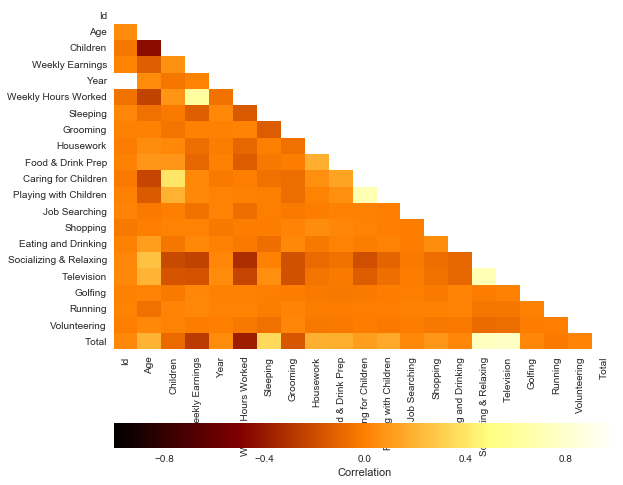

In [8]:
plt.figure(facecolor='white', frameon=False, figsize=(9,9));
sns.set_style('whitegrid');
corr_mat = train.corr();
i=1;
for index in corr_mat.index:
    corr_mat.loc[index][i:]=1;
    i=i+1;
sns.heatmap(corr_mat, cbar_kws={"orientation": "horizontal", "label": "Correlation"}, cmap='afmhot');
plt.yticks(rotation=0);

In [9]:
train['Employment Status'].unique()

array(['Unemployed', 'Employed', 'Not in labor force'], dtype=object)

In [10]:
train['Employment Status'] =train['Employment Status'].map(lambda x: 1 if x=='Employed' else 0)

The probable columns of overlap could be<br>
    1. Food and drink prep / housework 
    2. caring for children and playing with children
    3. Television and socializing & relaxing
Now, we will look awhich two combinations sattisfy the relation of one being a subset of another



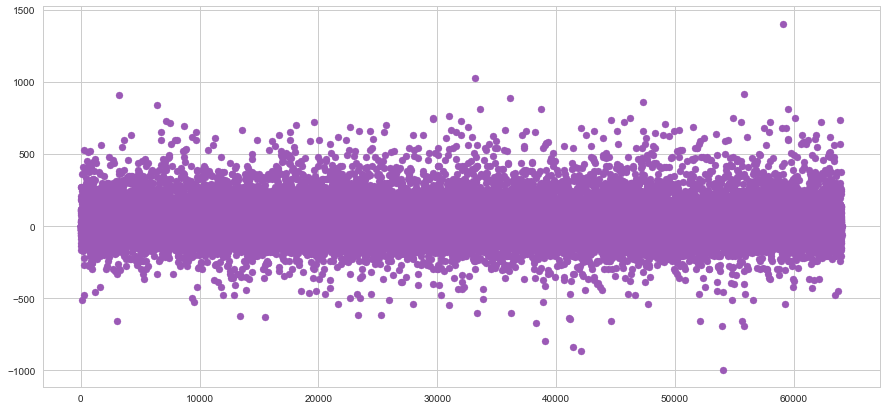

In [11]:
fig, ax = plt.subplots(figsize=(15,7));
plt.scatter(train.index,(train['Housework'] - train['Food & Drink Prep']));

lets plot there line graph w.r.t. index

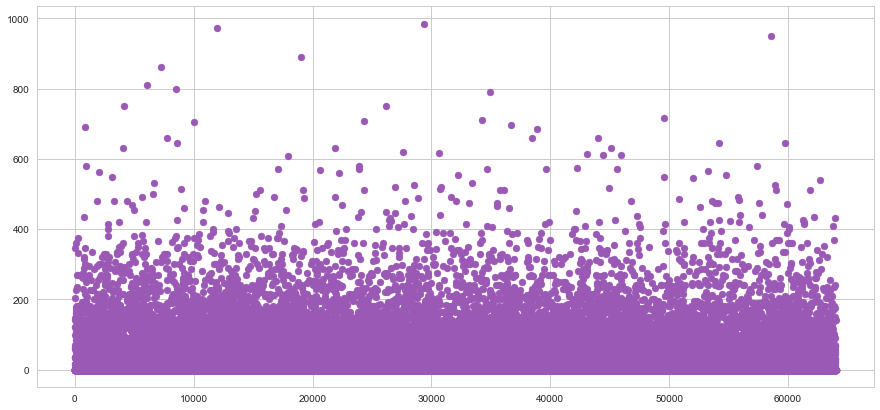

In [12]:
fig, ax = plt.subplots(figsize=(15,7));
plt.scatter(train.index,(train['Caring for Children'] - train['Playing with Children']));

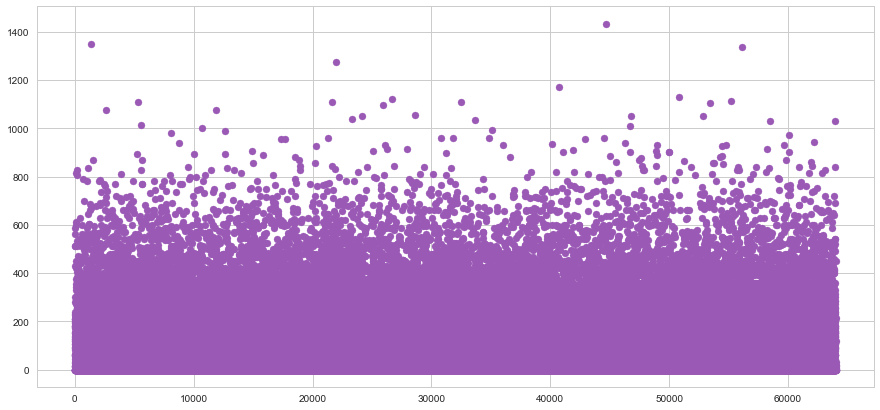

In [13]:
fig, ax = plt.subplots(figsize=(15,7));
plt.scatter(train.index,(train['Socializing & Relaxing'] - train['Television']));

After looking at the correlation matrix and the scatter plots of the difference value of the pair, we can say that columns of overlap could be

2. caring for children and playing with children
3. Television and socializing & relaxing


In [14]:
train['Socializing & Relaxing excluding TV'] = train['Television'] - train['Socializing & Relaxing'];
train['Caring for Children excluding Play'] =  train['Caring for Children'] - train['Playing with Children'];

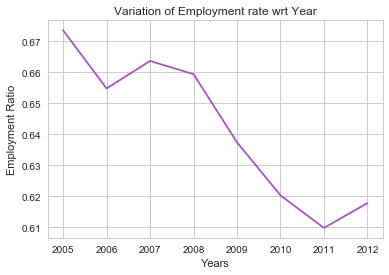

In [15]:
# effect of 2008 on employment ratio
grouped = train.groupby('Year').mean()['Employment Status'];
plt.plot(grouped);
ax = plt.gca();
ax.set_xlabel('Years');
ax.set_title('Variation of Employment rate wrt Year');
ax.set_ylabel('Employment Ratio');
#Seems like 2008 has affected the employment ratio

In [16]:
grouped.sort_values()

Year
2011    0.609799
2012    0.617798
2010    0.620297
2009    0.637420
2006    0.654793
2008    0.659418
2007    0.663667
2005    0.673584
Name: Employment Status, dtype: float64

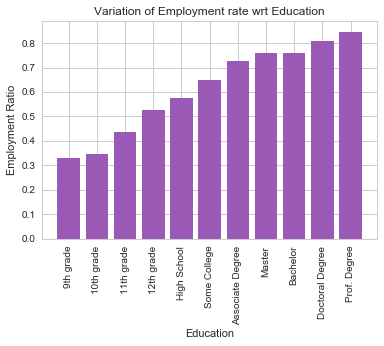

In [17]:
# effect of 2008 on employment ratio
grouped = train.groupby('Education Level').mean()['Employment Status'];
grouped = grouped.sort_values();
plt.bar(np.arange(len(grouped.index)), grouped.values);
ax = plt.gca();
ax.set_xlabel('Education');
ax.set_xticks(np.arange(len(grouped.index)));
ax.set_xticklabels(grouped.index, rotation = 'vertical');
ax.set_title('Variation of Employment rate wrt Education');
ax.set_ylabel('Employment Ratio');#Seems like 2008 has affected the employment ratio

In [18]:
train.set_index('Id', inplace=True)

In [19]:
np.mean(train['Employment Status']) # not skewed

0.6420960534949849

Features

In [20]:
train.head()

,Education Level,Age,Age Range,Employment Status,Gender,Children,Weekly Earnings,Year,Weekly Hours Worked,Sleeping,...,Shopping,Eating and Drinking,Socializing & Relaxing,Television,Golfing,Running,Volunteering,Total,Socializing & Relaxing excluding TV,Caring for Children excluding Play
Id,,,,,,,,,,,,,,,,,,,,,
1,High School,51,50-59,0,Female,0,0,2005,0,825,...,0,40,180,120,0,0,0,24.000000,-60,0
2,Bachelor,42,40-49,1,Female,2,1480,2005,40,500,...,120,40,15,15,0,0,0,21.583333,0,345
3,Master,47,40-49,1,Male,0,904,2005,40,480,...,15,85,214,199,0,0,0,17.733333,-15,0
4,Some College,21,20-29,1,Female,0,320,2005,40,705,...,105,30,240,240,0,0,0,26.833333,0,0
5,High School,49,40-49,0,Female,0,0,2005,0,470,...,0,35,600,40,0,0,0,23.750000,-560,0


In [21]:
for age in list(train['Age Range'].unique()):
    train[age] = (train['Age Range']==age).astype('int8')
train.head()
del train['Age Range']

In [22]:
for edu in list(train['Education Level'].unique()):
    train[edu] = (train['Education Level']==age).astype('int8')
train.head()
del train['Education Level']

In [23]:
train['Gender'] = train['Gender'].map(lambda x: 1 if x=='Male' else 0)

In [24]:
train['Total excluding Overlap'] = train['Total'] - train['Television']/60 - train['Playing with Children']/60
train['Job Search/Leisure'] = train['Job Searching']/train['Socializing & Relaxing']
train['Children/Leisure'] = train['Children']/train['Socializing & Relaxing']
train['Children/Eating&Drinking'] = train['Children']/train['Eating and Drinking']
train['Children/Age'] = train['Children']/train['Age']
train['Leisure/JobSearch'] = train['Socializing & Relaxing']/train['Job Searching']
train['Caring per Children'] = train['Caring for Children']/train['Children']
train['JobSearch/Total'] = train['Job Searching']/train['Total']


In [25]:
train.loc[:,'Total excluding Overlap':'JobSearch/Total'] = train.loc[:,'Total excluding Overlap':'JobSearch/Total'].applymap(lambda x: (10000 if x==np.inf else x)).fillna(0)

In [26]:
kmeanerror=[]
k=[2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n in k:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(train.drop(['Employment Status','Weekly Hours Worked','Weekly Earnings'], axis=1))
    kmeanerror.append(kmeans.inertia_)


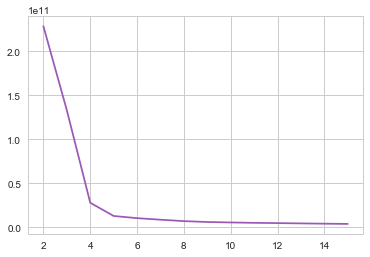

In [27]:
plt.plot(k, kmeanerror);

In [28]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(train.drop(['Employment Status','Weekly Hours Worked','Weekly Earnings'], axis=1))
cluster = kmeans.predict(train.drop(['Employment Status','Weekly Hours Worked','Weekly Earnings'], axis=1))


In [29]:
cluster = pd.get_dummies(cluster, prefix='cluster')
train = train.join(cluster)

In [30]:
np.any(train == np.inf)

False

In [31]:
np.any(train == np.nan)

False

In [32]:
np.sum(np.isnan(train))

Age                                    0
Employment Status                      0
Gender                                 0
Children                               0
Weekly Earnings                        0
Year                                   0
Weekly Hours Worked                    0
Sleeping                               0
Grooming                               0
Housework                              0
Food & Drink Prep                      0
Caring for Children                    0
Playing with Children                  0
Job Searching                          0
Shopping                               0
Eating and Drinking                    0
Socializing & Relaxing                 0
Television                             0
Golfing                                0
Running                                0
Volunteering                           0
Total                                  0
Socializing & Relaxing excluding TV    0
Caring for Children excluding Play     0
50-59           

In [33]:
train = train.dropna()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Employment Status','Weekly Hours Worked','Socializing & Relaxing',
                                                                'Total excluding Overlap','Weekly Earnings',
                                                                'Total', 'Caring for Children'], axis=1), 
                                                                           train['Employment Status'], train_size=0.7, random_state=840836)

In [36]:
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

In [37]:
param_xgb = {
    'eta':0.1
    ,'max_depth':5
    ,'min_child_weight':7
    ,'subsample':0.9
    ,'colsample_bytree':0.9
    ,'eval_metric':'error'
}

In [38]:
model = xgb.train(
    param_xgb,
    dtrain,
    num_boost_round=49
)

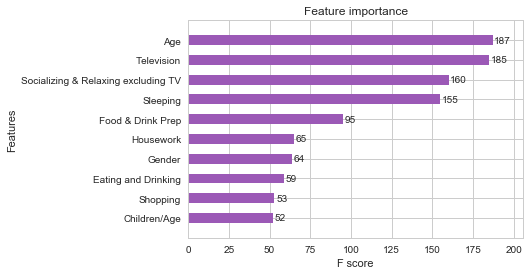

In [39]:
xgb.plot_importance(model, height=0.5, max_num_features=10);

In [40]:
print('F1_score on train data is: {}'.format(np.round(metrics.f1_score(y_train, np.round(model.predict(dtrain))),2)));
print('F1_score on test data is: {}'.format(np.round(metrics.f1_score(y_test, np.round(model.predict(dtest))),2)));

F1_score on train data is: 0.86
F1_score on test data is: 0.85


In [41]:
submission = pd.read_excel('Test Dataset.xlsx', index='id')

In [42]:
def transform_df(df):
    df['Socializing & Relaxing excluding TV'] = df['Television'] - df['Socializing & Relaxing'];
    df['Caring for Children excluding Play'] =  df['Caring for Children'] - df['Playing with Children'];
    for age in list(df['Age Range'].unique()):
        df[age] = (df['Age Range']==age).astype('int8')
    df.head()
    del df['Age Range']
    for edu in list(df['Education Level'].unique()):
        df[edu] = (df['Education Level']==age).astype('int8')
    df.head()
    del df['Education Level']
    df['Gender'] = df['Gender'].map(lambda x: 1 if x=='Male' else 0);
    df['Total excluding Overlap'] = df['Total'] - df['Television']/60 - df['Playing with Children']/60
    df['Job Search/Leisure'] = df['Job Searching']/df['Socializing & Relaxing']
    df['Children/Leisure'] = df['Children']/df['Socializing & Relaxing']
    df['Children/Eating&Drinking'] = df['Children']/df['Eating and Drinking']
    df['Children/Age'] = df['Children']/df['Age']
    df['Leisure/JobSearch'] = df['Socializing & Relaxing']/df['Job Searching']
    df['Caring per Children'] = df['Caring for Children']/df['Children']
    df['JobSearch/Total'] = df['Job Searching']/df['Total']
    
    df.loc[:,'Total excluding Overlap':'JobSearch/Total'] = df.loc[:,'Total excluding Overlap':'JobSearch/Total'].applymap(lambda x: (10000 if x==np.inf else x)).fillna(0)
    
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(df.drop(['Employment Status','Weekly Hours Worked','Weekly Earnings'], axis=1))
    cluster = kmeans.predict(df.drop(['Employment Status','Weekly Hours Worked','Weekly Earnings'], axis=1))
    
    cluster = pd.get_dummies(cluster, prefix='cluster')
    df = df.join(cluster)
    
    df.drop(['Employment Status','Weekly Hours Worked','Socializing & Relaxing',
                                                                'Total excluding Overlap','Weekly Earnings',
                                                                'Total', 'Caring for Children'], axis=1)

    return df

In [43]:
transformed_submission = transform_df(submission)

In [44]:
dsubmission = xgb.DMatrix(transformed_submission[X_train.columns])

In [45]:
submission['Employment Status'] = np.round(model.predict(dsubmission)).astype('int')

In [46]:
submission['Employment Status'].mean()

0.7122332431620079

In [47]:
submission[['id','Employment Status']].to_excel('Submission.xlsx')